In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product
import yfinance as yf
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from statsmodels.tsa.arima.model import ARIMAResults
loadedmodel = ARIMAResults.load('bestTimeSeriesModel')

#data = yf.download("AMC", period="1d", interval="1m")
df = pd.DataFrame(data, columns = ['Open','High','Low','Close','Adj Close','Volume'])

df.head(10)

# writing data frame to a CSV file


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-06-07 09:30:00-04:00,52.380001,52.540001,51.500000,52.070000,52.070000,18394627
2021-06-07 09:31:00-04:00,52.070000,52.500000,51.779999,51.945000,51.945000,432595
2021-06-07 09:32:00-04:00,52.000000,54.330002,51.799999,54.290001,54.290001,5887875
2021-06-07 09:33:00-04:00,54.230000,56.139999,53.650002,55.112900,55.112900,4770990
2021-06-07 09:34:00-04:00,55.119999,55.689999,54.299999,54.634701,54.634701,2594145
2021-06-07 09:35:00-04:00,54.599998,55.500000,54.110001,54.200001,54.200001,2569764
2021-06-07 09:36:00-04:00,54.209999,54.250000,53.240101,54.090099,54.090099,2423874
2021-06-07 09:37:00-04:00,54.099998,54.770000,53.209999,53.230000,53.230000,1956090
2021-06-07 09:38:00-04:00,53.230000,53.980000,53.160000,53.794998,53.794998,1228928


In [45]:
df.to_csv('FAdvanced.csv')
df = pd.read_csv('FAdvanced.csv')
df['Dates'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M').dt.date
df['Hour'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M').dt.time
df.drop(df.columns[[0]], axis = 1, inplace = True)
df_list = [d for _, d in df.groupby(['Dates'])]
temp = df_list[0]


In [46]:
Predictions = loadedmodel.predict(start=temp.last_valid_index()-24, end=temp.last_valid_index())
#upscaling
Predictions = Predictions*(temp.iloc[-25]['Close']/Predictions.iloc[0])

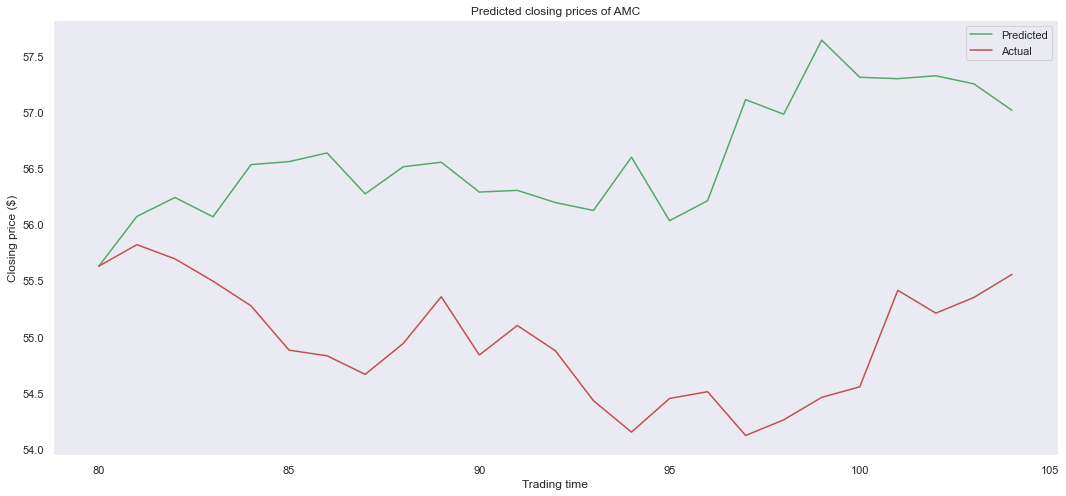

In [47]:
comparison = pd.DataFrame({'predicted': Predictions, 'actual': temp.tail(25)['Close']})
plt.figure(figsize=(18, 8))
plt.plot(comparison.predicted,'g', label='Predicted')
plt.plot(comparison.actual,'r',label='Actual')
plt.title('Predicted closing prices of AMC')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading time')
plt.legend(loc='best')
plt.grid(False)
plt.show()